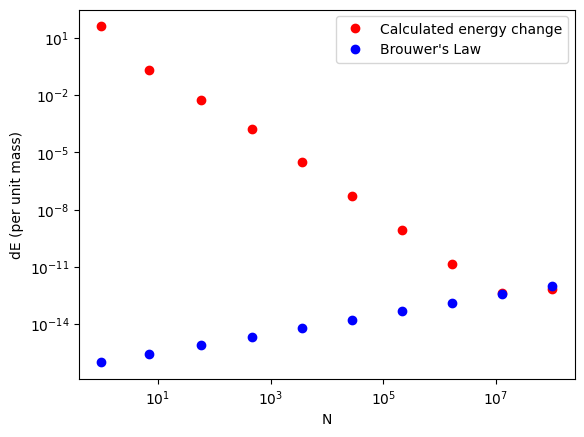

In [4]:
import numpy as np
import matplotlib.pyplot as plt

GM = 1.3271e20
AU = 1.496e11

x0 = AU
y0 = 0
u0 = 0
v0 = np.sqrt(GM/x0)

Ns = np.geomspace(1,1e8,num=10,dtype=int)
for N in Ns:
    t_tot = 365*24*60*60 # 1 Year of integration time
    dt = t_tot/ (N)
    r = np.zeros(N+1)
    x = np.zeros(N+1)
    y = np.zeros(N+1)
    u = np.zeros(N+1)
    v = np.zeros(N+1)


    r[0] = np.sqrt(x0**2 + y0**2)
    x[0] = x0
    y[0] = y0
    u[0] = u0
    v[0] = v0


    for i in range(N):
        r[i+1] = np.sqrt(x[i]**2 + y[i]**2)
        acc_x = -GM*(x[i] / (r[i] ** 3)) # Acc. vector component in x direciton
        acc_y = -GM*(y[i] / (r[i] ** 3))
        u[i+1] = u[i] + acc_x*dt
        v[i+1] = v[i] + acc_y*dt
        x[i+1] = x[i] + u[i+1]*dt
        y[i+1] = y[i] + v[i+1]*dt

    E_f = 0.5*(v[-1]**2 + u[-1]**2) - GM/r[-1] # Energy value calculated using kinetic and pot. energy
    E_i = 0.5*(v[0]**2 + u[0]**2) - GM/r[0]
    dE = abs((E_f - E_i) / E_i) 
    plt.loglog((N),dE,'or')
    plt.loglog(N,np.sqrt(N)*1e-16,'ob')
plt.xlabel("N")
plt.ylabel("dE (per unit mass)")
plt.legend(["Calculated energy change", "Brouwer's Law"])
plt.show()





AttributeError: Text.set() got an unexpected keyword argument 'aspect'

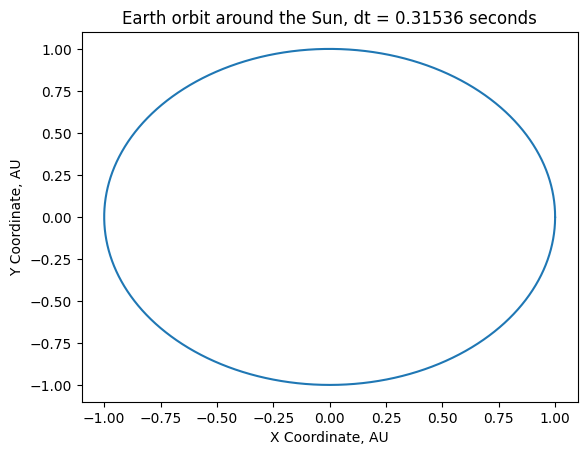

In [5]:

plt.plot(x/AU,y/AU)
plt.xlabel("X Coordinate, AU")
plt.ylabel("Y Coordinate, AU")
plt.title("Earth orbit around the Sun, dt = {} seconds".format(dt),aspect='square')
plt.show()


For smaller numbers of N, the error decreases as N increases, since we are integrating with smaller and smaller iterations, meaning the orbit is more accurate. However, once the integration step is small enough, the change in energy is so small that roundoff error begins to occur and we start to see evidence of Brouwer's Law.